# Analysis of flipcart data

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')#inbuilt method filterwarnings() used to ignore warnings 

In [2]:
#read_csv() inbuilt method of pandas to read data from csv file
df=pd.read_csv('flipcart_samsung_smartphones.csv')
df.head(2)#head() inbuilt method to print first 2 observation in table bt default it gives 1st five obs

,Model_name,Ratings,Customers_rated,RAM,Internal_storage,Display_size,Camera,Battery_mAh,Price,Discount,Final_Price
0,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",4.2,"40,455",4 GB RAM,128 GB ROM,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,"₹13,999",21% off,"₹10,999"
1,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4.2,"40,455",4 GB RAM,64 GB ROM,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,"₹12,999",23% off,"₹9,999"


In [3]:
print('Total no.of rows and columns : ',df.shape)#to show how many no.of rows and columns in data

Total no.of rows and columns :  (537, 11)


In [4]:
print('All column names :')#to show column names in list
for i in df.columns:
    print(i,end=' ')

All column names :
Model_name Ratings Customers_rated RAM Internal_storage Display_size Camera Battery_mAh Price Discount Final_Price 

In [5]:
df.info()#it gives all information about data like column names,data type,number of obs etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model_name        537 non-null    object 
 1   Ratings           535 non-null    float64
 2   Customers_rated   535 non-null    object 
 3   RAM               537 non-null    object 
 4   Internal_storage  537 non-null    object 
 5   Display_size      537 non-null    object 
 6   Camera            537 non-null    object 
 7   Battery_mAh       537 non-null    object 
 8   Price             537 non-null    object 
 9   Discount          537 non-null    object 
 10  Final_Price       537 non-null    object 
dtypes: float64(1), object(10)
memory usage: 46.3+ KB


In [6]:
#t find total number of null values in data
df.isnull().sum()# inbuilt method isnull() to find null values and inbuilt method sum() to find total 

Model_name          0
Ratings             2
Customers_rated     2
RAM                 0
Internal_storage    0
Display_size        0
Camera              0
Battery_mAh         0
Price               0
Discount            0
Final_Price         0
dtype: int64

In [7]:
df=df.dropna()#inbuilt method dropna() used to drop/delete the observations/rows having null values

In [8]:
#to show number of rows and columns after deleting rows having null values
print('Total no.of rows and columns : ',df.shape) 

Total no.of rows and columns :  (535, 11)


In [9]:
#to check null values are still present or not
df.isnull().sum()

Model_name          0
Ratings             0
Customers_rated     0
RAM                 0
Internal_storage    0
Display_size        0
Camera              0
Battery_mAh         0
Price               0
Discount            0
Final_Price         0
dtype: int64

In [10]:
#'Customers_rated' column data type is given as object because of special character comma
#so inbuilt function replace() is used to replace comma with no other value
df['Customers_rated']=df['Customers_rated'].str.replace(',','')

In [11]:
#'RAM' column data type is object because of character values are present
#inbuilt method apply() is used to apply function on column
#so for single line user defined function lamda function is used
#inbuilt method split() used to separate values after empty space 
#to retrieve first value indexing in used 0th index=1st value
df['RAM']=df['RAM'].apply(lambda x:x.split()[0])

In [12]:
#'Internal_storage' column data type is object because of character values are present
#inbuilt method apply() is used to apply function on column
#so for single line user defined function lamda function is used
#inbuilt method split() used to separate values after empty space 
#to retrieve first value indexing in used 0th index=1st value
df['Internal_storage']=df['Internal_storage'].apply(lambda x:x.split()[0])

In [13]:
#'Display_size' column data type is object because of character values and special characters are present
#inbuilt method apply() is used to apply function on column
#so for single line user defined function lamda function is used
#inbuilt method split() used to separate values after empty space 
#to retrieve first value indexing in used 0th index=1st value
df['Display_size']=df['Display_size'].apply(lambda x:x.split()[0])

In [14]:
#'Battery_mAh' column data type is object because of character values and special characters are present
#inbuilt method apply() is used to apply function on column
#so for single line user defined function lamda function is used
#inbuilt method split() used to separate values after empty space 
#to retrieve first value indexing in used 0th index=1st value
df['Battery_mAh']=df['Battery_mAh'].apply(lambda x:x.split()[0])

In [15]:
#'Price' column data type is given as object because of special character comma and ₹
#so inbuilt function replace() is used to replace ₹ and comma with no other value
df['Price']=df['Price'].str.replace('₹','')
df['Price']=df['Price'].str.replace(',','')

In [16]:
#'Discount' column data type is object because of character values and special characters are present
#inbuilt method apply() is used to apply function on column
#so for single line user defined function lamda function is used
#inbuilt method split() used to separate values after special character % 
#to retrieve first value indexing in used 0th index=1st value
df['Discount']=df['Discount'].apply(lambda x:x.split('%')[0])

In [17]:
#'Final_Price' column data type is object because of special character
#so inbuilt function replace() is used to replace ₹ and comma with no other value
df['Final_Price']=df['Final_Price'].str.replace('₹','')
df['Final_Price']=df['Final_Price'].str.replace(',','')

In [18]:
df.head(2)#to print 1st 2 observations to check changes are made permanently or not

,Model_name,Ratings,Customers_rated,RAM,Internal_storage,Display_size,Camera,Battery_mAh,Price,Discount,Final_Price
0,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",4.2,40455,4,128,16.55,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000,13999,21,10999
1,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4.2,40455,4,64,16.55,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000,12999,23,9999


In [19]:
#to_numeric() inbuilt method of pandas is used to change datatype of variables/columns
#it changes type to int or float depending upon values
df['RAM']=pd.to_numeric(df['RAM'])
df['Display_size']=pd.to_numeric(df['Display_size'])
df['Discount']=pd.to_numeric(df['Discount'])

In [20]:
##inbuilt method astype() is used to change datatype of variables/columns
#it changes type to int or float according to user passing argument
df['Customers_rated']=df['Customers_rated'].astype(int)#change object type to integer
df['RAM']=df['RAM'].astype(float)#change object type to float
df['Internal_storage']=df['Internal_storage'].astype(int)#change object type to integer
df['Battery_mAh']=df['Battery_mAh'].astype(int)#change object type to integer
df['Price']=df['Price'].astype(int)#change object type to integer
df['Final_Price']=df['Final_Price'].astype(int)#change object type to integer

In [21]:
#to check data type of observations changes are made permanently or not
df.dtypes

Model_name           object
Ratings             float64
Customers_rated       int32
RAM                 float64
Internal_storage      int32
Display_size        float64
Camera               object
Battery_mAh           int32
Price                 int32
Discount              int64
Final_Price           int32
dtype: object

In [22]:
#flipcart_samsung_smartphone data having some values in differnt format
#'RAM' column consisting values in GB's but few values are added in MB's
#sort_values() is inbuilt method to arrange all data in descending format
data=df.sort_values(['RAM'],axis=0,ascending=False)#store this data into new temporary variable
n=len(data[data['RAM']>20])# inbuilt method len() is used to find length of data for given condition
print('Total no.of values are added in MBs instead of GBs : ',n)

Total no.of values are added in MBs instead of GBs :  27


In [23]:
data=data.head(n) #store 1st n observations in temporary variable
#using for loop we store index of n observations in list
list=[i for i in data.index]#list comprehension
#inbuilt method index is used to find index of obseravations
#using for loop we access index values  
for i in list:
    df['RAM'][i]=round((df['RAM'][i])/1000,1)
    #using index locations change those observations MBs into GBs in main data permanently
    #round() method used to round values after decimal place

In [24]:
##'Internal_storage' column consisting values in GB's but few values are added in TB's
#sort_values() is inbuilt method to arrange all data in ascending format
data=df.sort_values(['Internal_storage'],axis=0)#store this data into new temporary variable
n=len(data[(data['Internal_storage']==1) & (data['Final_Price']>15000)])
# inbuilt method len() is used to find length of data for given condition
print('Total no.of values are added in TBs instead of GBs : ',n)

Total no.of values are added in TBs instead of GBs :  1


In [25]:
data=data.head(n)#store 1st n observations in temporary variable
#using for loop we store index of n observations in list
list=[i for i in data.index]#list comprehension
#inbuilt method index is used to find index of obseravations
#using for loop we access index values
for i in list:
    df['Internal_storage'][i]=(df['Internal_storage'][i])*1000
    #using index locations change those observations TBs into GBs in main data permanently

In [26]:
#'Internal_storage' column consisting values in GB's but few values are added in MB's
#sort_values() is inbuilt method to arrange all data in descending format
data=df.sort_values(['Internal_storage'],axis=0,ascending=False)
n=len(df[df['Internal_storage']>1000])# inbuilt method len() is used to find length of data for given condition
print('Total no.of values are added in MBs instead of GBs : ',n)

Total no.of values are added in MBs instead of GBs :  2


In [27]:
data=data.head(n) #store 1st n observations in temporary variable
#using for loop we store index of n observations in list
list=[i for i in data.index]#list comprehension
#inbuilt method index is used to find index of obseravations
#using for loop we access index values  
for i in list:
    df['Internal_storage'][i]=(df['Internal_storage'][i])/1000
    #using index locations change those observations MBs into GBs in main data permanently

In [28]:
#To store data permanently into csv file use inbuilt method to_csv()
df.to_csv('final_data.csv',encoding='utf-8')#unf-8 is unicode transforming format 8bits

In [29]:
#inbuilt method describe() gives summary statistics like count,mean,standard deviation,
#minimum value,1st quantile,2nd quantile/median,3rd quantile,maximum value etc
print('Summary Statistics of Ratings :')
df['Ratings'].describe()

Summary Statistics of Ratings :


count    535.000000
mean       4.215327
std        0.236605
min        3.000000
25%        4.100000
50%        4.300000
75%        4.400000
max        4.600000
Name: Ratings, dtype: float64

In [30]:
print('Model_names having minimum ratings')
data=df[df['Ratings']==3.0]
for i,j in data.items():#inbuilt method items() used to access keys and keyvalues 
    if i=='Model_name':
        print(j)


Model_names having minimum ratings
353    SAMSUNG Sm-G361Hhadins (Charcoal Gray, 8 GB)
Name: Model_name, dtype: object


In [31]:
print('Model_names having maximum ratings')
data=df[df['Ratings']==4.6]
for i,j in data.items():#inbuilt method items() used to access keys and keyvalues 
    if i=='Model_name':
        print(j)

Model_names having maximum ratings
132          SAMSUNG Galaxy Note 9 (Ocean Blue, 512 GB)
134             SAMSUNG Galaxy S10 (Prism Blue, 128 GB)
139            SAMSUNG Galaxy S10 (Prism White, 512 GB)
149     SAMSUNG Galaxy Note 9 (Metallic Copper, 128 GB)
151          SAMSUNG Galaxy Note 9 (Ocean Blue, 128 GB)
153      SAMSUNG Galaxy Note 9 (Midnight Black, 512 GB)
162     SAMSUNG Galaxy S8 Plus (Midnight Black, 128 GB)
207     SAMSUNG Galaxy S10 Plus (Ceramic Black, 512 GB)
263    SAMSUNG Galaxy Note 10 Plus (Aura Black, 256 GB)
345     SAMSUNG Galaxy Note 10 Plus (Aura Glow, 256 GB)
378        SAMSUNG Galaxy S10 Plus (Prism Blue, 128 GB)
391     SAMSUNG Galaxy Note 9 (Metallic Copper, 512 GB)
392    SAMSUNG Galaxy Note 10 Plus (Aura White, 256 GB)
409        SAMSUNG Galaxy Note 9 (Alpine White, 128 GB)
414             SAMSUNG Galaxy S8 (Burgundy Red, 64 GB)
423            SAMSUNG Galaxy S10 (Prism White, 128 GB)
437            SAMSUNG Galaxy S10 (Prism Black, 128 GB)
442          

In [32]:
print('Summary Statistics of Customers_rated :')
df['Customers_rated'].describe()

Summary Statistics of Customers_rated :


count       535.000000
mean      13700.009346
std       44665.036204
min           3.000000
25%         715.000000
50%        2227.000000
75%        7191.000000
max      365765.000000
Name: Customers_rated, dtype: float64

In [33]:
print('Model names having minimum Customers rating :')
data=df[df['Customers_rated']==3]
print(data['Model_name'])

Model names having minimum Customers rating :
353    SAMSUNG Sm-G361Hhadins (Charcoal Gray, 8 GB)
Name: Model_name, dtype: object


In [34]:
print('Model names having maximum Customers rating :')
data=df[df['Customers_rated']==365765]
for i,j in data.items():#inbuilt method items() used to access keys and keyvalues 
    if i=='Model_name':
        print(j)

Model names having maximum Customers rating :
287    SAMSUNG Galaxy On Nxt (Black, 16 GB)
302     SAMSUNG Galaxy On Nxt (Gold, 16 GB)
Name: Model_name, dtype: object


In [35]:
print('Summary Statistics of Discount :')
df['Discount'].describe()

Summary Statistics of Discount :


count    535.000000
mean       5.622430
std       11.209424
min        0.000000
25%        0.000000
50%        0.000000
75%        6.000000
max       57.000000
Name: Discount, dtype: float64

In [36]:
print('Model names having minimum Discount :')
data=df[df['Discount']==0]
for i,j in data.items():#inbuilt method items() used to access keys and keyvalues 
    if i=='Model_name':
        print(j)

Model names having minimum Discount :
13                    SAMSUNG Galaxy M12 (Black, 64 GB)
17         SAMSUNG GALAXY M51 (Celestial Black, 128 GB)
20                     SAMSUNG Galaxy M02 (Blue, 32 GB)
23                     SAMSUNG Galaxy M02 (Blue, 32 GB)
24      SAMSUNG Galaxy M42 5G (Prism Dot Black, 128 GB)
                             ...                       
532    SAMSUNG Galaxy Grand I9082 (Metallic Blue, 8 GB)
533               SAMSUNG S7 Edge (Black Pearl, 128 GB)
534                 SAMSUNG Grand Prime 4G (Gold, 8 GB)
535       SAMSUNG Galaxy S7 Edge (Gold Platinum, 32 GB)
536                      SAMSUNG On7 Pro (Black, 16 GB)
Name: Model_name, Length: 374, dtype: object


In [37]:
print('Model names having maximum Discount :')
data=df[df['Discount']==57]
for i,j in data.items():#inbuilt method items() used to access keys and keyvalues 
    if i=='Model_name':
        print(j)

Model names having maximum Discount :
440    SAMSUNG Galaxy S7 (Gold Platinum, 32 GB)
Name: Model_name, dtype: object


In [38]:
print('Summary Statistics of Final_Price :')
df['Final_Price'].describe()

Summary Statistics of Final_Price :


count       535.000000
mean      24297.175701
std       22118.274326
min        3500.000000
25%        9935.500000
50%       16199.000000
75%       28000.000000
max      134999.000000
Name: Final_Price, dtype: float64

In [39]:
print('Model names having minimum Final Price :')
data=df[df['Final_Price']==3500]
for i,j in data.items():#inbuilt method items() used to access keys and keyvalues 
    if i=='Model_name':
        print(j)

Model names having minimum Final Price :
492    SAMSUNG Galaxy Star Advance (Black, 4 GB)
Name: Model_name, dtype: object


In [40]:
print('Model names having maximum Final Price :')
data=df[df['Final_Price']==134999]
for i,j in data.items():#inbuilt method items() used to access keys and keyvalues 
    if i=='Model_name':
        print(j)

Model names having maximum Final Price :
398    SAMSUNG Galaxy Fold 2 (Mystic Black, 256 GB)
Name: Model_name, dtype: object


In [41]:
df.describe()#to show summary statistics of all numeric datatype columns

,Ratings,Customers_rated,RAM,Internal_storage,Display_size,Battery_mAh,Price,Discount,Final_Price
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,4.215327,13700.009346,4.085794,74.489720,14.759813,3702.654206,11370.921495,5.622430,24297.175701
std,0.236605,44665.036204,2.613410,91.691345,2.053777,1283.789328,24690.385091,11.209424,22118.274326
min,3.000000,3.000000,0.500000,4.000000,7.370000,1200.000000,0.000000,0.000000,3500.000000
25%,4.100000,715.000000,2.000000,16.000000,13.210000,2850.000000,0.000000,0.000000,9935.500000
50%,4.300000,2227.000000,4.000000,32.000000,15.240000,3500.000000,0.000000,0.000000,16199.000000
75%,4.400000,7191.000000,6.000000,128.000000,16.385000,4500.000000,12449.000000,6.000000,28000.000000
max,4.600000,365765.000000,12.000000,1000.000000,19.300000,7000.000000,189999.000000,57.000000,134999.000000


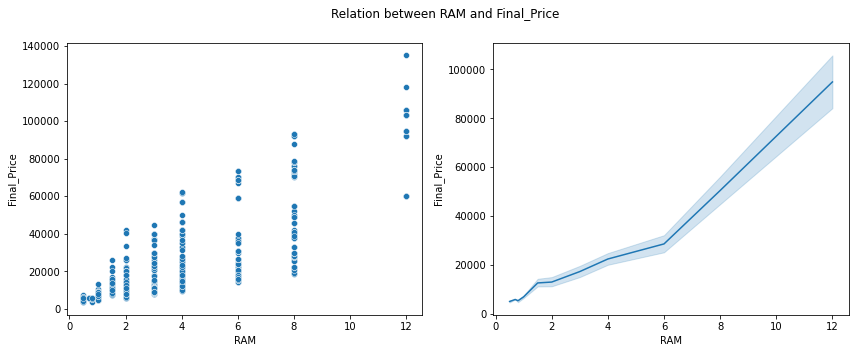

In [42]:
#To find relation between RAM and Final_Price
plt.figure(figsize=(14,5))#figure() inbuilt method of pyplot to adjust/change size of plot (width,height)
plt.subplot(1,2,1)#inbuilt method subplot(rowindex=1,no.columns=2,column index=1)
#used to print multiple plot side by side 
sns.scatterplot(data=df,x='RAM',y='Final_Price')
#scatterplot is inbuilt method of seaborn library to print scatterplot
plt.subplot(1,2,2)#inbuilt method subplot(rowindex=1,no.columns=2,column index=2)
sns.lineplot(data=df,x='RAM',y='Final_Price')
#lineplot is inbuilt method of seaborn library to print lineplot
plt.suptitle('Relation between RAM and Final_Price')#inbuilt method suptitle() used to give combine title to plot
plt.show()#inbuilt method of pyplot show() is used to show plot in good manner

Conclusion:There is relation between Final_Price and RAM,
when RAM values increases Final_Price values are also increases .

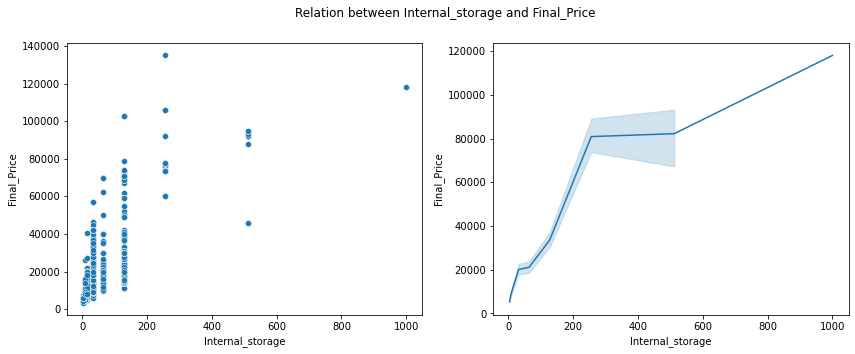

In [43]:
#to find relation between Internal_storage and Final_Price
plt.figure(figsize=(14,5))#figure() inbuilt method of pyplot to adjust/change size of plot (width,height)
plt.subplot(1,2,1)#inbuilt method subplot(rowindex=1,no.columns=2,column index=1)
#used to print multiple plot side by side
sns.scatterplot(data=df,x='Internal_storage',y='Final_Price')
#scatterplot is inbuilt method of seaborn library to print scatterplot
plt.subplot(1,2,2)#inbuilt method subplot(rowindex=1,no.columns=2,column index=2)
sns.lineplot(data=df,x='Internal_storage',y='Final_Price')
#lineplot is inbuilt method of seaborn library to print lineplot
plt.suptitle('Relation between Internal_storage and Final_Price')
plt.show()#inbuilt method of pyplot show() is used to show plot in good manner

Conclusion:There is relation between Final_Price and Internal_storage,
when Internal_storage values are increases Final_Price are also increases.

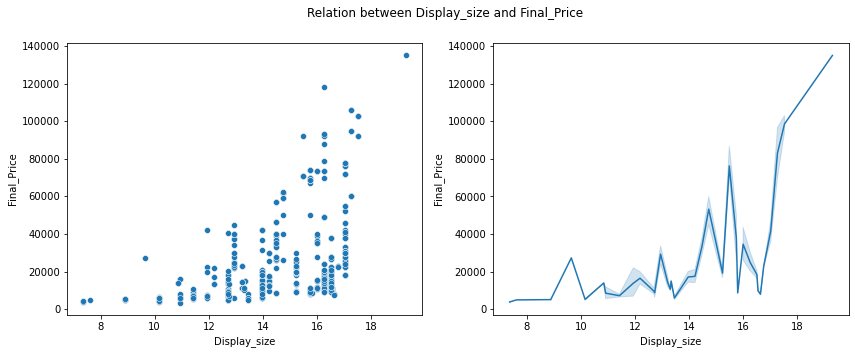

In [44]:
#to find relation between Display_size and Final_Price
plt.figure(figsize=(14,5))#figure() inbuilt method of pyplot to adjust/change size of plot (width,height)
plt.subplot(1,2,1)#inbuilt method subplot(rowindex=1,no.columns=2,column index=1)
#used to print multiple plot side by side
sns.scatterplot(data=df,x='Display_size',y='Final_Price')
#scatterplot is inbuilt method of seaborn library to print scatterplot
plt.subplot(1,2,2)#inbuilt method subplot(rowindex=1,no.columns=2,column index=2)
sns.lineplot(data=df,x='Display_size',y='Final_Price')
#lineplot is inbuilt method of seaborn library to print lineplot
plt.suptitle('Relation between Display_size and Final_Price')
plt.show()#inbuilt method of pyplot show() is used to show plot in good manner

Conclusion:There is relation between Final_Price and Display_size,
Final_Price changes with Display_size values.

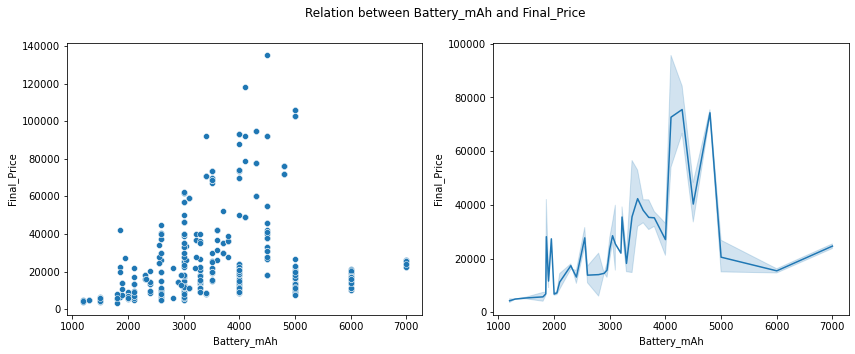

In [45]:
#to find relation between Battery_mAh and Final_Price
plt.figure(figsize=(14,5))#figure() inbuilt method of pyplot to adjust/change size of plot (width,height)
plt.subplot(1,2,1)#inbuilt method subplot(rowindex=1,no.columns=2,column index=1)
#used to print multiple plot side by side
sns.scatterplot(data=df,x='Battery_mAh',y='Final_Price')
#scatterplot is inbuilt method of seaborn library to print scatterplot
plt.subplot(1,2,2)#inbuilt method subplot(rowindex=1,no.columns=2,column index=2)
sns.lineplot(data=df,x='Battery_mAh',y='Final_Price')
#lineplot is inbuilt method of seaborn library to print lineplot
plt.suptitle('Relation between Battery_mAh and Final_Price')
plt.show()#inbuilt method of pyplot show() is used to show plot in good manner

Conclusion:There is relation between Final_Price and Battery_mAh,
Final_Price varies with Battery_mAh values.

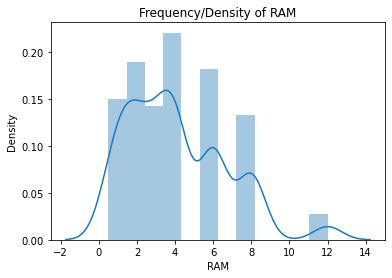

In [46]:
#To find frequency/density of RAM values
sns.distplot(df['RAM'])#distplot() is inbuilt method of seaborn library
#it print both histogram and frequency curve
plt.title('Frequency/Density of RAM')
plt.show()

Conclusion:Frequency increasing as RAM values increases but after certain value it starts decreasing

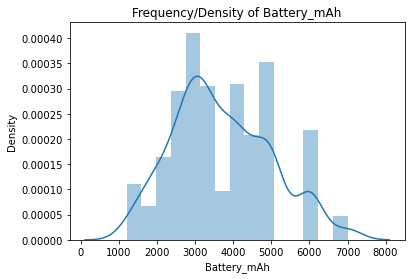

In [47]:
#To find frequency/density of Battery_mAh values
sns.distplot(df['Battery_mAh'])
plt.title('Frequency/Density of Battery_mAh')
plt.show()

Conclusion:Frequency increasing as Battery_mAh values increases but after certain value it starts decreasing

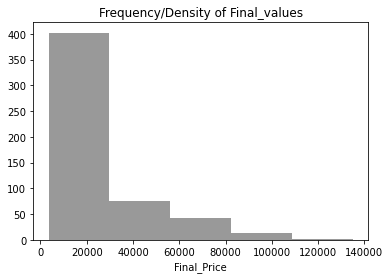

In [48]:
##To find frequency of Final_Price values
sns.distplot(df['Final_Price'],kde=False,bins=5,color='black')
#distplot() print both histogram and freq curve kde=False will not print freq curve
plt.title('Frequency/Density of Final_values')
plt.show()

Conclusion:Frequency is high when Final_Price is less than 40000 and 
very less when Final_Price is more than 80000 

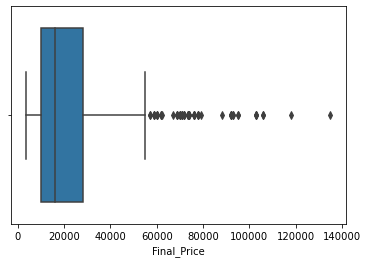

In [49]:
#To show outliers are present in Final_Price or not
sns.boxplot(df['Final_Price'])#boxplot() is inbuilt method of seaborn library
#boxplot shows 1st quantile,median,3rd quantile ,upper range and lower range and outliers in data
plt.show()

Conclusion: Many outliers are present in Final_Price values

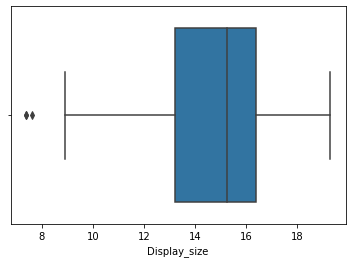

In [50]:
#To show outliers are present in Display_size or not
sns.boxplot(df['Display_size'])
#boxplot shows 1st quantile,median,3rd quantile ,upper range and lower range and outliers in data
plt.show()

Conclusion: Few outliers present in Display_size values

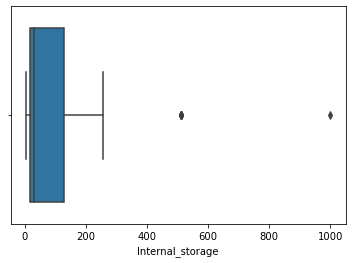

In [51]:
#To show outliers are present in Internal_storage or not
sns.boxplot(df['Internal_storage'])
#boxplot shows 1st quantile,median,3rd quantile ,upper range and lower range and outliers in data
plt.show()

Conclusion: Few outliers are present in Internal_storage values

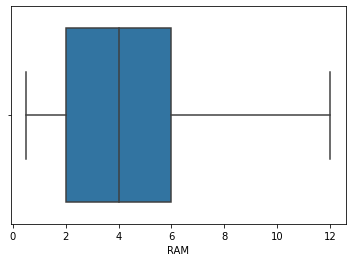

In [52]:
#To show outliers are present in RAM or not
sns.boxplot(df['RAM'])
#boxplot shows 1st quantile,median,3rd quantile ,upper range and lower range and outliers in data
plt.show()

Conclusion: No outliers present in RAM values